# Pleiades Star Cluster Dataset #

Color-Magnitude diagrams are commonly used in Astronomy to display star clusters. I want to investigate the Pleiades cluster dataset acquired from http://www.atnf.csiro.au/outreach//education/senior/astrophysics/pleiadesdata.csv to make a color-magnitude diagram and calculate the distance to the cluster based on the data we are given.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
data=np.genfromtxt('pleiadesdata.csv', delimiter=',', skip_header=5)   #importing the data 
star_n=data[:,0]  #taking the first column of the data, the star number
v_mag=data[:,1] #taking the V apparent magnitude column
B_mag=data[:,2] #taking the B apparent magnitude column
Cl=data[:,3] # taking the B-V column

The B-V Colour Index can be calculated by simply subtracting the V magnitude from the B magnitude. Let's plot each star as a point with V magnitude on y vs. B-V color index on x with inverted y axis and see what it looks like.

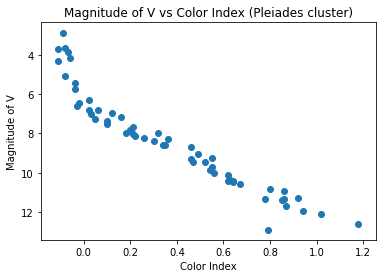

In [45]:
c=B_mag-v_mag  #calculationg the color index from the V and B apparent magnitudes 

plt.scatter(c, v_mag, ) #plotting the color index as the x-coordinates and the V 
                        #magnitude as the y coordinate in a scatter plot
plt.gca().invert_yaxis()  #inverting the y-axis
plt.ylabel("Magnitude of V")
plt.xlabel("Color Index")
plt.title("Magnitude of V vs Color Index (Pleiades cluster)")
plt.show()

I overplotted a line that shows the main sequence (from data in Allen's Astrophysical Quantities) on the graph and added a constant equal to the difference of the averages of the apparent and absolute magnitudes of all stars to fit the line the best to the Pleiades cluster. This worked well as an approximate method to fit the line.

The constant that needs to be added to the absolute magnitude to make the plots match is 5.38518688024


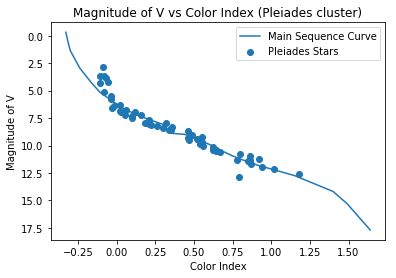

In [46]:
b_v = np.array([-0.33,-0.31,-0.30,-0.24,-0.17, -0.11,-0.02, 0.05, 0.15, 0.30, 0.35, 0.44, 0.52, 0.58, 0.63, 0.68, 0.74, 0.81, 0.91, 1.15, 1.40, 1.49, 1.64])  #creating an array of the color index from the data given to us in the assignment
M_v = np.array([-5.7 ,-4.5 ,-4.0 ,-2.45,-1.2 , -0.25, 0.65, 1.3 , 1.95, 2.7 , 3.5 , 3.6 , 4.0 , 4.4 , 4.7 , 5.1 , 5.5 , 5.9 , 6.4 , 7.35, 8.8 , 9.9 ,12.3])  #creating an array for the absolute V magnitude from the data given to us in the assignment 
avg_1=np.mean(v_mag) #getting the average of the V apparent magnitude
avg_2=np.mean(M_v) #getting the average of the V absolute magnitude 
x=avg_1-avg_2 #finding a constant that needs to be added to the absolute V magnitude 
              #so that the main sequence curve matches the photometric data for the Pleiades cluster
print("The constant that needs to be added to the absolute magnitude to make the plots match is",x)
M_v+=x  #adding on the constant found above 
plt.scatter(c, v_mag, label='Pleiades Stars') #plotting the color index as the x-coordinates and the V amgnitude 
                        #as the y coordinate in a scatter plot
plt.gca().invert_yaxis()  #inverting the y-axis
plt.plot(b_v, M_v, label='Main Sequence Curve') #plotting the color index as the x coordinates and the 
                   #absolute magnitude plus the constant for the y coordinates
plt.legend()
plt.ylabel("Magnitude of V")
plt.xlabel("Color Index")
plt.title("Magnitude of V vs Color Index (Pleiades cluster)")
plt.show()

I calculated the distance based on the constant because the constant I approximated can be considered the distance modulus. Therefore, we can solve for the distance in terms of parsecs. We arrive at around 119 parsecs which is somewhat close to the distance given by Hipparcos sattelite (https://www.skyandtelescope.com/astronomy-news/resolving-pleiades-distance-problem-08282014/).

In [47]:
d=np.sqrt(100**((x)/5))*10  #computing the distance to the Pleiades cluster
print("The distance to the Pleiades cluster is", d,"parsecs.") 

The distance to the Pleiades cluster is 119.409086533 parsecs.
